In [1]:
import tensorflow as tf
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

In [2]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [4]:

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)


In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((25000, 200), (25000,), (25000, 200), (25000,))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

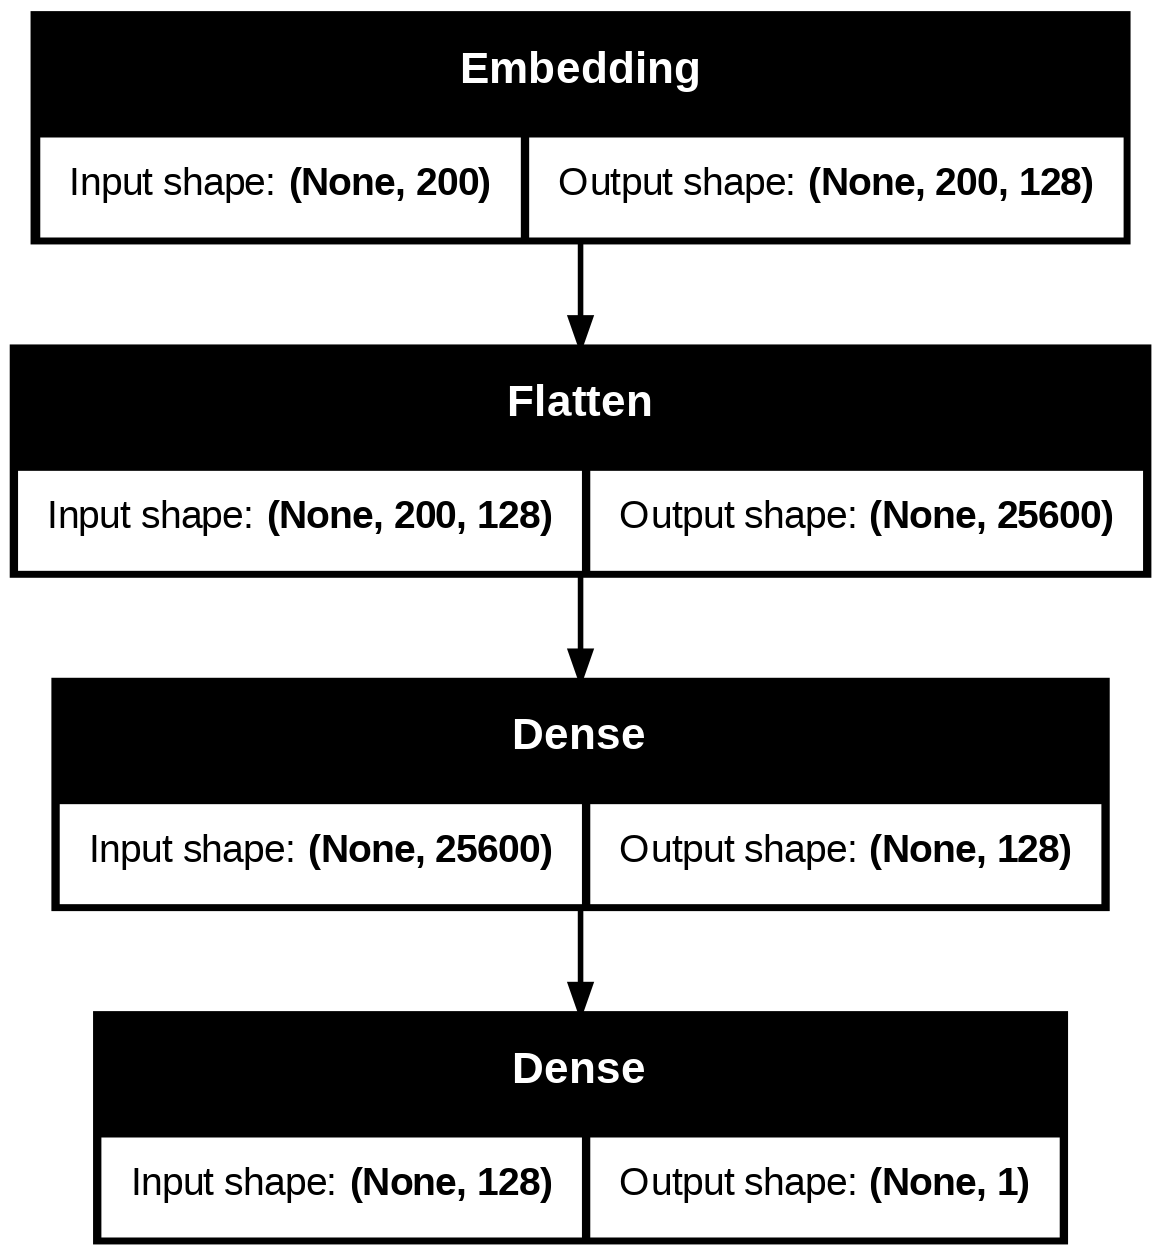

In [10]:
model.build(input_shape=(None, max_len)) # Add this line

tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,276,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,557,057 (17.38 MB)

 Trainable params: 4,557,057 (17.38 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:

history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 32s 152ms/step - accuracy: 0.6766 - loss: 0.5520 - val_accuracy: 0.8500 - val_loss: 0.3428
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 27s 139ms/step - accuracy: 0.9649 - loss: 0.1046 - val_accuracy: 0.8425 - val_loss: 0.4192
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 41s 138ms/step - accuracy: 0.9977 - loss: 0.0143 - val_accuracy: 0.8464 - val_loss: 0.5035
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 42s 141ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.8512 - val_loss: 0.5133
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 39s 133ms/step - accuracy: 0.9999 - loss: 8.4515e-04 - val_accuracy: 0.8541 - val_loss: 0.5332


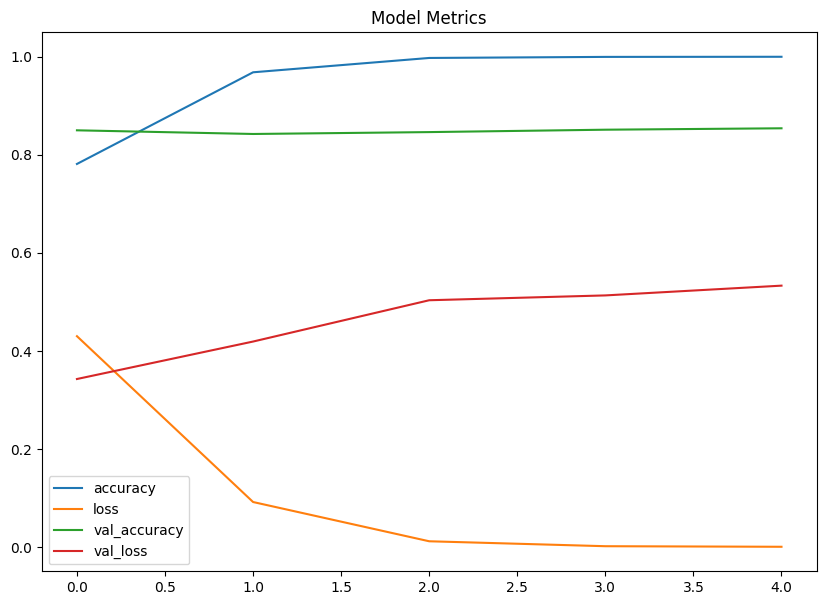

In [14]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model Metrics")
plt.show()

In [15]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8553 - loss: 0.5328
Test Accuracy: 0.8541200160980225


In [16]:
y_pred = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [17]:
y_pred

array([[0.001119  ],
       [0.99999917],
       [0.05495552],
       ...,
       [0.06793968],
       [0.01213881],
       [0.95765626]], dtype=float32)

In [18]:
y_pred = y_pred.flatten()

In [19]:
y_pred

array([0.001119  , 0.99999917, 0.05495552, ..., 0.06793968, 0.01213881,
       0.95765626], dtype=float32)

In [20]:
y_pred = (y_pred > 0.5).astype(int)

In [21]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85     12500
           1       0.85      0.85      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



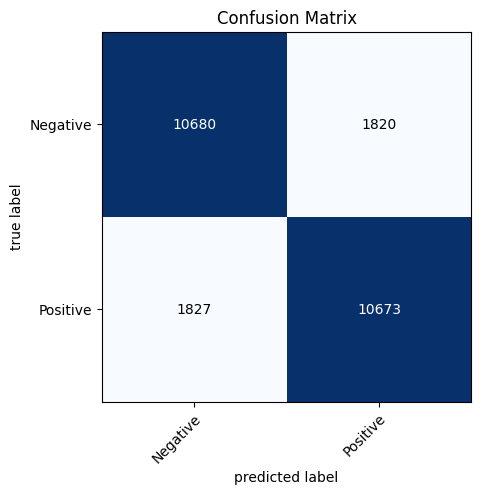

In [22]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, class_names=['Negative', 'Positive'])
plt.title("Confusion Matrix")
plt.show()